### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import cv2 as cv
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import os
import warnings
warnings.filterwarnings('ignore')

###  Explore data


In [9]:
Class_name=os.listdir("./train")
Class_name

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

###  distribition of training data before "data augmentation"


<BarContainer object of 7 artists>

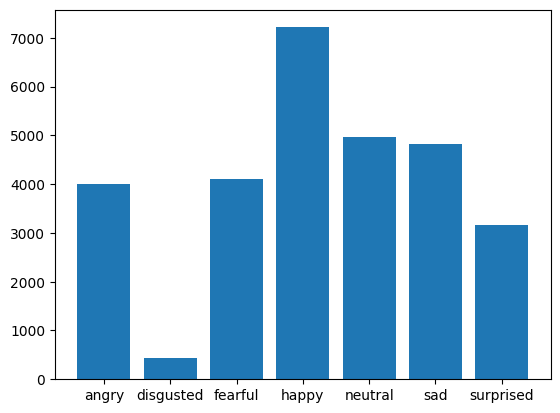

In [11]:
train_count=[]
for i in Class_name:
    train_count.append(len(os.listdir("./train/"+i+"/")))
plt.bar(Class_name,train_count)

### generat more data

In [13]:
train_datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        
                                        )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                        )
train_generator = train_datagen.flow_from_directory(directory = "./train",
                                                    target_size = (48,48),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical"
                                                   )
test_generator = test_datagen.flow_from_directory( directory = "./test",
                                                              target_size = (48,48),
                                                              batch_size = 32,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                             )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### model architecture

In [14]:
CNN= Sequential()
CNN.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
CNN.add(Conv2D(64,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(128,(3,3),padding='same',activation='relu'))
CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Flatten()) 

CNN.add(Dense(100,activation = 'relu'))

CNN.add(Dense(50,activation = 'relu'))

CNN.add(Dense(225,activation = 'relu'))

CNN.add(BatchNormalization())
CNN.add(Dropout(0.25))

CNN.add(Dense(7, activation='softmax'))

In [15]:
CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [17]:
CNN.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
history = CNN.fit(
    train_generator ,
    epochs=55,
    batch_size=32)

Epoch 1/55
898/898 [==============================] - 328s 363ms/step - loss: 1.9073 - accuracy: 0.2444
Epoch 2/55
898/898 [==============================] - 453s 504ms/step - loss: 1.6356 - accuracy: 0.3588
Epoch 3/55
898/898 [==============================] - 405s 451ms/step - loss: 1.4581 - accuracy: 0.4372
Epoch 4/55
898/898 [==============================] - 348s 388ms/step - loss: 1.3455 - accuracy: 0.4856
Epoch 5/55
898/898 [==============================] - 389s 433ms/step - loss: 1.2788 - accuracy: 0.5139
Epoch 6/55
898/898 [==============================] - 350s 390ms/step - loss: 1.2283 - accuracy: 0.5338
Epoch 7/55
898/898 [==============================] - 351s 390ms/step - loss: 1.1912 - accuracy: 0.5504
Epoch 8/55
898/898 [==============================] - 352s 392ms/step - loss: 1.1699 - accuracy: 0.5585
Epoch 9/55
898/898 [==============================] - 347s 386ms/step - loss: 1.1431 - accuracy: 0.5687
Epoch 10/55
898/898 [==============================] - 344s 383m

In [30]:
CNN.evaluate(test_generator)

225/225 [==============================] - 35s 154ms/step - loss: 0.9564 - accuracy: 0.6737


[0.9564153552055359, 0.6737252473831177]

### ACC and Loss  VS Number of Epochs


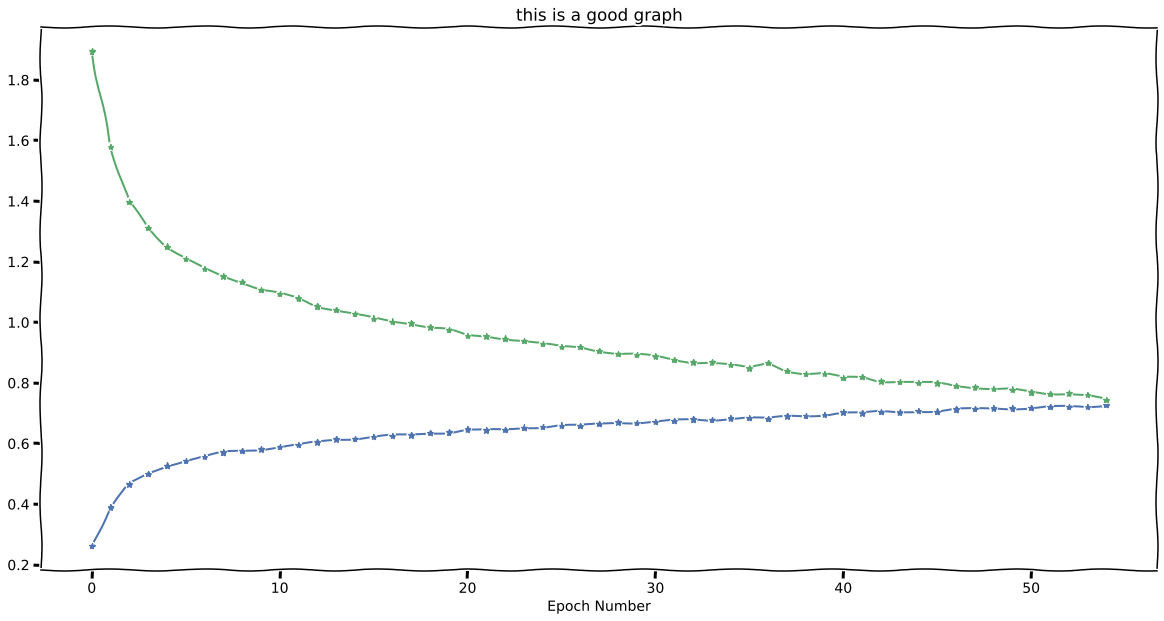

In [31]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

plt.xkcd()
plt.style.use('seaborn-deep')

plt.rcParams["figure.figsize"] = (20, 10) 

plt.plot(history.history['accuracy'],marker="*",label="Acc Value")
plt.plot(history.history['loss'],marker="*",label="loss Value")
plt.grid(True)

plt.title("this is a good graph")
plt.xlabel("Epoch Number")
plt.ylabel("")

plt.show()

### save model

In [32]:
CNN.save("emotion_model.h5")
#CNN.save_weights("Model_weights.h5")